# EDA for Prices Dataset

Initial look at data and data cleaning


## Import necassary libraries

In [31]:
# Import necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats

In [32]:
#Load dataset
df_prices = pd.read_csv('../data/prices_20210713.csv')

In [33]:
df_prices.head()

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,NaN
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,NaN
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,NaN
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,NaN
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,NaN


## Correcting date and time formatting.

In [34]:
df_prices['date_from'] = pd.to_datetime(df_prices['date_from'], errors = 'coerce')
df_prices['date_to'] = pd.to_datetime(df_prices['date_to'], errors = 'coerce')


In [35]:
df_prices.query('price_per_day_from <= 3') 

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from
22175,f3b75783-7156-5644-b032-b4cbb2cc239c,6.0,2019-09-15,2019-10-20,1.0,NaN
22176,f3b75783-7156-5644-b032-b4cbb2cc239c,3.0,2019-10-20,2019-12-21,1.0,NaN
22177,f3b75783-7156-5644-b032-b4cbb2cc239c,7.0,2019-12-21,2020-01-07,1.0,NaN
22178,f3b75783-7156-5644-b032-b4cbb2cc239c,3.0,2020-01-07,2020-04-30,1.0,NaN
22179,f3b75783-7156-5644-b032-b4cbb2cc239c,6.0,2019-05-01,2019-06-29,1.0,NaN
...,...,...,...,...,...,...
414132,c0794503-406d-5e62-8d8d-f8bf55feeb91,NaN,2020-12-20,2020-12-21,2.0,NaN
414133,c0794503-406d-5e62-8d8d-f8bf55feeb91,3.0,2020-12-24,2020-12-25,2.0,NaN
414134,c0794503-406d-5e62-8d8d-f8bf55feeb91,NaN,2020-12-27,2020-12-28,2.0,NaN
414135,c0794503-406d-5e62-8d8d-f8bf55feeb91,3.0,2020-12-31,2021-01-01,2.0,NaN


In [36]:
df_prices

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,NaN
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,NaN
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,NaN
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,NaN
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,NaN
...,...,...,...,...,...,...
496970,ab6fd3ee-a49a-5dc5-bc67-784515bccde7,4.0,2021-03-29,2021-04-12,109.0,NaN
496971,ab6fd3ee-a49a-5dc5-bc67-784515bccde7,4.0,2021-04-12,2021-06-28,99.0,NaN
496972,ab6fd3ee-a49a-5dc5-bc67-784515bccde7,4.0,2021-06-28,2021-08-30,109.0,NaN
496973,ab6fd3ee-a49a-5dc5-bc67-784515bccde7,4.0,2021-08-30,2021-12-20,79.0,NaN


In [37]:
df_prices.head()

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,NaN
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,NaN
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,NaN
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,NaN
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,NaN


In [38]:
df_prices.describe().round()

,min_days,price_per_day_from,price_per_week_from
count,496174.0,474779.0,237725.0
mean,4.0,104.0,731.0
std,2.0,267.0,32858.0
min,1.0,0.0,0.0
25%,3.0,64.0,420.0
50%,4.0,85.0,550.0
75%,6.0,120.0,763.0
max,28.0,153153.0,16016033.0


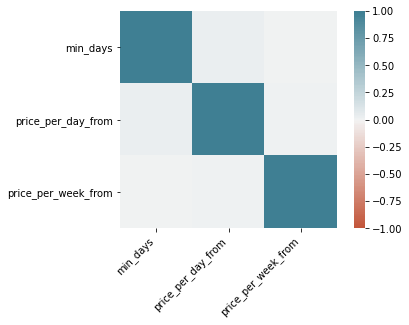

In [39]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_prices.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

## Clean 95th quantile

In [40]:
# Calculate .95 quantile for numerical features
print('Quantiles 0.95 for:')
print('days:', df_prices.price_per_day_from.quantile([.95]))
print('weeks:', df_prices.price_per_week_from.quantile([.95]))

Quantiles 0.95 for:
days: 0.95    220.0
Name: price_per_day_from, dtype: float64
weeks: 0.95    1379.0
Name: price_per_week_from, dtype: float64


In [41]:
# Get names of indexes for which column filled_in_price_per_day has value higher than the 95 quintile.
indexNames = df_prices[df_prices['price_per_day_from'] > 220 ].index
# Delete these row indexes from dataFrame
df_prices.drop(indexNames , inplace=True)

# Get names of indexes for which column price_per_week_from has value higher than the 95 quintile.
indexNames = df_prices[df_prices['price_per_week_from'] >  1379].index
# Delete these row indexes from dataFrame
df_prices.drop(indexNames , inplace=True)

## Translating "price per day" to "price per week", and visa versa.

In [42]:
df_prices['filled_in_price_per_day']= df_prices.price_per_day_from.fillna(
    (df_prices.price_per_week_from)/7) 
df_prices['filled_in_price_per_week'] = df_prices.price_per_week_from.fillna(
    (df_prices.price_per_day_from)*7) 
df_prices.head()

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,NaN,70.0,490.0
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,NaN,78.0,546.0
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,NaN,70.0,490.0
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,NaN,58.0,406.0
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,NaN,80.0,560.0


## Checking work

In [43]:

df_prices['price_per_week_from'].isna().value_counts()

True     244742
False    224683
Name: price_per_week_from, dtype: int64

In [44]:
df_prices['filled_in_price_per_week'].isna().value_counts()

False    466319
True       3106
Name: filled_in_price_per_week, dtype: int64

Not Nan should be reduced but still exist when there was not price set in either column.

## Validating whether 999 and 9999 are real values

In [45]:
df_prices['filled_in_price_per_day'].isna().value_counts()

False    466319
True       3106
Name: filled_in_price_per_day, dtype: int64

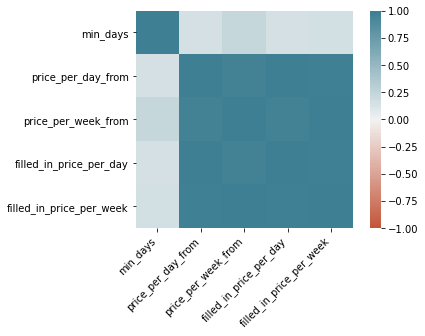

In [46]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_prices.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [47]:
df_prices.query('filled_in_price_per_day == 9999 or filled_in_price_per_day == 999') 

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week


In [48]:
df_prices.query('filled_in_price_per_day == 9999 or filled_in_price_per_day == 999').count()

listing_id                  0
min_days                    0
date_from                   0
date_to                     0
price_per_day_from          0
price_per_week_from         0
filled_in_price_per_day     0
filled_in_price_per_week    0
dtype: int64

In [49]:
smf.ols(formula='price_per_week_from ~ price_per_day_from', data=df_prices).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     price_per_week_from   R-squared:                       0.917
Model:                             OLS   Adj. R-squared:                  0.917
Method:                  Least Squares   F-statistic:                 2.305e+06
Date:                 Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                         13:37:31   Log-Likelihood:            -1.1725e+06
No. Observations:               207592   AIC:                         2.345e+06
Df Residuals:                   207590   BIC:                         2.345e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             34.5122      0.389     88.790      0.000      33.750      35.274
price_per_day_from     6.3578      0.004   1518.151      0.000       6.350       6.366
==============================================================================
Omnibus:                   185408.660   Durbin-Watson:                   0.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9497017.181
Skew:                          -4.163   Prob(JB):                         0.00
Kurtosis:                      35.072   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As only 21 entries were 999 or 9999 was only in the weeks column, we have determined that 999 and 9999 are common placeholder values in this data set. 

## Checking that there are not an abundance of placeholder values (i.e. 0 or 1).

In [50]:
df_prices.query('filled_in_price_per_day == 1234').count()

listing_id                  0
min_days                    0
date_from                   0
date_to                     0
price_per_day_from          0
price_per_week_from         0
filled_in_price_per_day     0
filled_in_price_per_week    0
dtype: int64

## Replacing all values of 0, 1, 999, and 9999.

In [51]:
df_prices['filled_in_price_per_day']= df_prices.filled_in_price_per_day.replace(
    [0, 1, 999, 9999], [np.NaN, np.NaN, np.NaN, np.NaN])
df_prices['filled_in_price_per_week']= df_prices.filled_in_price_per_week.replace(
    [0, 1, 999, 9999], [np.NaN, np.NaN, np.NaN, np.NaN])

## Searching for nonsense prices

In [52]:
bad_data = df_prices.filled_in_price_per_day >= df_prices.filled_in_price_per_week
bad_data.value_counts()

False    469369
True         56
dtype: int64

In [53]:
df_prices.query('filled_in_price_per_day >= 5000')

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week


In [54]:
df_prices.head()

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,NaN,70.0,490.0
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,NaN,78.0,546.0
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,NaN,70.0,490.0
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,NaN,58.0,406.0
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,NaN,80.0,560.0


## Deleting bad data

In [55]:
# Get names of indexes for which column filled_in_price_per_day has value greater than or equal to filled_in_price_per_week
indexNames2 = df_prices[df_prices['filled_in_price_per_day'] >= df_prices['filled_in_price_per_week']].index
# Delete these row indexes from dataFrame
df_prices.drop(indexNames2 , inplace=True)

In [56]:
# Get names of indexes for which column filled_in_price_per_week over 1_000_000
indexNames = df_prices[df_prices['filled_in_price_per_week'] >= 140_000 ].index
# Delete these row indexes from dataFrame
df_prices.drop(indexNames , inplace=True)

In [57]:
df_prices.head()

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,NaN,70.0,490.0
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,NaN,78.0,546.0
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,NaN,70.0,490.0
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,NaN,58.0,406.0
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,NaN,80.0,560.0


## Checking high values

In [58]:
df_prices.query('filled_in_price_per_day >= 5000')

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week


## Looking at date information

In [59]:
pd.to_datetime(df_prices.date_from)

0        2020-04-01
1        2020-06-15
2        2020-09-13
3        2020-11-01
4        2020-12-24
            ...    
496970   2021-03-29
496971   2021-04-12
496972   2021-06-28
496973   2021-08-30
496974   2021-12-20
Name: date_from, Length: 469369, dtype: datetime64[ns]

KeyboardInterrupt: 

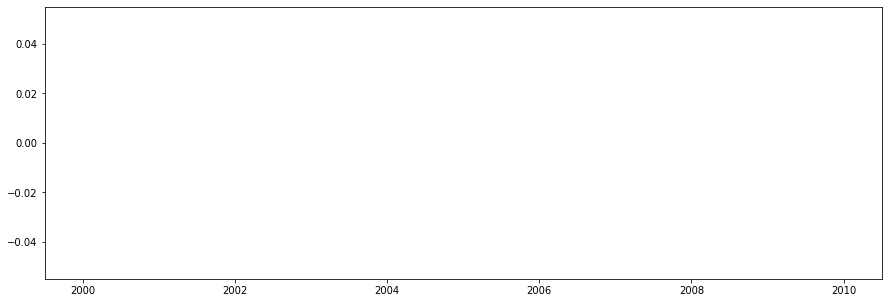

In [60]:
df_prices['month'] = pd.to_datetime(df_prices['date_from']).dt.to_period('M')
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=df_prices, x="date_from", y="filled_in_price_per_day")

## Checking correlation between weeks and days

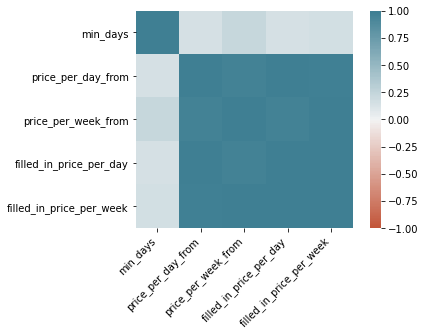

In [61]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_prices.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [62]:
corr

,min_days,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
min_days,1.000000,0.156166,0.233976,0.155889,0.170426
price_per_day_from,0.156166,1.000000,0.958667,1.000000,0.984161
price_per_week_from,0.233976,0.958667,1.000000,0.962087,1.000000
filled_in_price_per_day,0.155889,1.000000,0.962087,1.000000,0.984648
filled_in_price_per_week,0.170426,0.984161,1.000000,0.984648,1.000000


Text(0.5, 1.0, 'Price contrast between week and day')

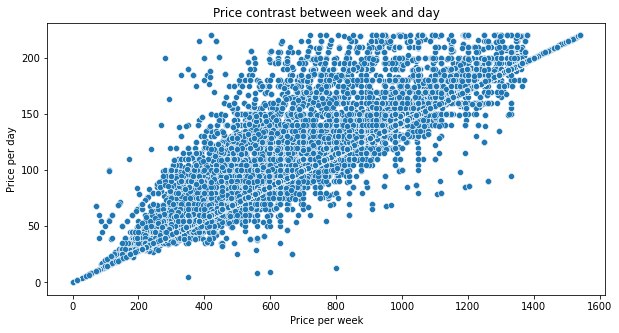

In [75]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(x=df_prices.filled_in_price_per_week, y=df_prices.filled_in_price_per_day)
ax.set(xlabel='Price per week', ylabel='Price per day')
plt.title('Price contrast between week and day')

In [76]:
df_prices.describe()

,min_days,filled_in_price_per_day,filled_in_price_per_week
count,468664.000000,466126.000000,466085.000000
mean,4.203079,91.532907,631.464858
std,2.123518,39.676546,274.183614
min,1.000000,0.010000,0.070000
25%,3.000000,62.000000,420.000000
50%,4.000000,80.000000,560.000000
75%,6.000000,114.000000,770.000000
max,28.000000,220.000000,1540.000000


In [77]:
df_prices.median()

/var/folders/f3/z2tpzycd57bfz6359zgkz9f00000gn/T/ipykernel_50105/3474912872.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_prices.median()


min_days                        4.0
filled_in_price_per_day        80.0
filled_in_price_per_week      560.0
month                       2020-09
dtype: object

In [64]:
df_prices.filled_in_price_per_week.max()

1540.0

## Creating price_catagory column

In [65]:
def catagorizer(a, b):
    if np.isnan(a):
        if np.isnan(b):
            return "No_info"
        else:
            return "Week"
    else:
        if np.isnan(b):
            return "Day"
    return "Both"


In [66]:

df_prices['price_catagory']= df_prices.apply(lambda x: catagorizer(
    x['price_per_day_from'], x['price_per_week_from']), axis=1)

In [67]:
df_prices['price_catagory'].unique()

array(['Day', 'Both', 'No_info', 'Week'], dtype=object)

In [68]:
df_prices['price_catagory'].value_counts()

Day        241636
Both       207536
Week        17091
No_info      3106
Name: price_catagory, dtype: int64

In [69]:
df_prices[df_prices['price_catagory'] == "No_info"]

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week,month,price_catagory
238,0d6f6480-0191-5e9f-9f93-b73755bfd136,1.0,2019-01-01,2019-03-16,NaN,NaN,NaN,NaN,2019-01,No_info
243,0d6f6480-0191-5e9f-9f93-b73755bfd136,1.0,2019-10-26,2019-12-31,NaN,NaN,NaN,NaN,2019-10,No_info
411,21dfbd24-0801-529f-8661-983f8479cb0c,4.0,2018-11-16,2019-03-16,NaN,NaN,NaN,NaN,2018-11,No_info
417,21dfbd24-0801-529f-8661-983f8479cb0c,1.0,2019-11-16,2020-03-15,NaN,NaN,NaN,NaN,2019-11,No_info
475,f41ad7ef-189c-5bb1-8186-ed6b12bdb449,1.0,2018-11-04,2018-12-12,NaN,NaN,NaN,NaN,2018-11,No_info
...,...,...,...,...,...,...,...,...,...,...
496828,25daa696-ac23-5278-9c8e-1f2d7173d35c,1.0,2020-12-28,2021-04-19,NaN,NaN,NaN,NaN,2020-12,No_info
496837,25daa696-ac23-5278-9c8e-1f2d7173d35c,1.0,2021-12-26,2022-01-02,NaN,NaN,NaN,NaN,2021-12,No_info
496840,25daa696-ac23-5278-9c8e-1f2d7173d35c,1.0,2022-01-02,2022-01-03,NaN,NaN,NaN,NaN,2022-01,No_info
496844,25daa696-ac23-5278-9c8e-1f2d7173d35c,1.0,2022-03-31,2023-01-01,NaN,NaN,NaN,NaN,2022-03,No_info


## Deleting price_per_day_from and price_per_week_from

In [70]:
del df_prices['price_per_day_from']

In [71]:
del df_prices['price_per_week_from']

In [72]:
df_prices.head()

,listing_id,min_days,date_from,date_to,filled_in_price_per_day,filled_in_price_per_week,month,price_catagory
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,490.0,2020-04,Day
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,546.0,2020-06,Day
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,490.0,2020-09,Day
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,406.0,2020-11,Day
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,560.0,2020-12,Day


## Saving to CSV

In [73]:
df_prices.to_csv('../data/prices_dataset.csv')